# Tweet Cluster Analysis

In [83]:
import tweepy

In [84]:
# Authentication Credentials
# For testing please put your credentials here:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [86]:
# Tweepy Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [87]:
# Getting User
user = api.get_user('@bhawnani_ansh')

In [88]:
# Getting Tweets
tweets = user.timeline()
tweets_text = [tweet.text for tweet in tweets]

In [89]:
# Cleaning Tweets
import preprocessor as p
p.set_options(p.OPT.URL,p.OPT.EMOJI,p.OPT.SMILEY,)
tweets_text = [p.clean(tweet.lower()) for tweet in tweets_text]

In [90]:
# Lemmatization and stop words removal
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add("rt")
tweets_lematized = []
wnl = WordNetLemmatizer() 
for tweet in tweets_text:
    tweet = ' '.join([wnl.lemmatize(words) for words in nltk.word_tokenize(tweet) if not words in stop_words])
    tweets_lematized.append(tweet)

In [91]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
matrix = tfidf.fit_transform(tweets_lematized)

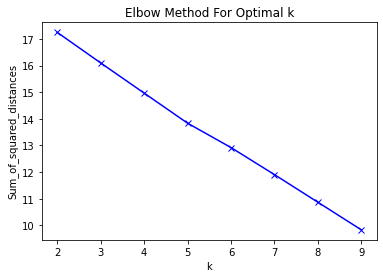

In [92]:
# Elbow method for optimal k
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k)
   km = km.fit(matrix)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [93]:
# Clustering
# A small vertex can be seen for k = 5. Therefore, taking k = 6
true_k = 6
model = KMeans(n_clusters=true_k)
model.fit(matrix)
labels=model.labels_
for i in range(len(labels)):
    print('Tweet '+str(i+1)+" belongs to cluster "+str(labels[i]))

Tweet 1 belongs to cluster 4
Tweet 2 belongs to cluster 2
Tweet 3 belongs to cluster 0
Tweet 4 belongs to cluster 0
Tweet 5 belongs to cluster 2
Tweet 6 belongs to cluster 2
Tweet 7 belongs to cluster 2
Tweet 8 belongs to cluster 3
Tweet 9 belongs to cluster 0
Tweet 10 belongs to cluster 4
Tweet 11 belongs to cluster 1
Tweet 12 belongs to cluster 0
Tweet 13 belongs to cluster 2
Tweet 14 belongs to cluster 5
Tweet 15 belongs to cluster 2
Tweet 16 belongs to cluster 0
Tweet 17 belongs to cluster 5
Tweet 18 belongs to cluster 3
Tweet 19 belongs to cluster 2
Tweet 20 belongs to cluster 3


Cluster: 0


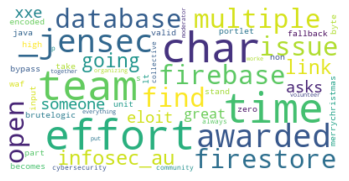

Cluster: 1


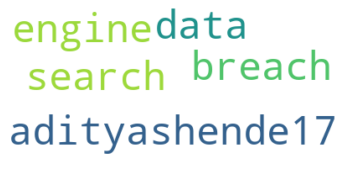

Cluster: 2


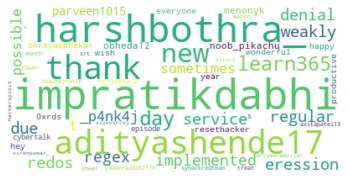

Cluster: 3


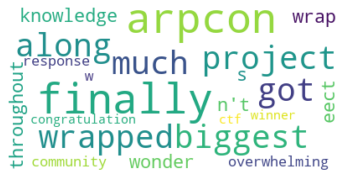

Cluster: 4


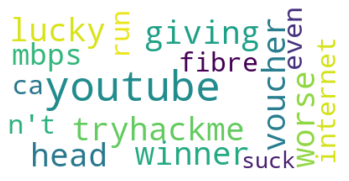

Cluster: 5


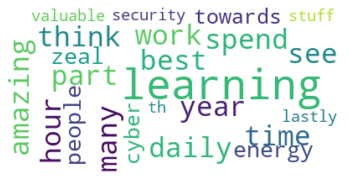

In [94]:
# Word cloud of the tweets of different clusters
from wordcloud import WordCloud
result={'cluster':labels,'tweets':tweets_lematized}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['tweets'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()